In [1]:
!wget https://raw.githubusercontent.com/Aparna2006/walmart-retail/main/data/walmart_full_dataset.csv

--2025-08-06 17:25:37--  https://raw.githubusercontent.com/Aparna2006/walmart-retail/main/data/walmart_full_dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 730 [text/plain]
Saving to: ‘walmart_full_dataset.csv’

walmart_full_datase 100%[===================>]     730  --.-KB/s    in 0s      

2025-08-06 17:25:37 (26.1 MB/s) - ‘walmart_full_dataset.csv’ saved [730/730]



In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("walmart_full_dataset.csv")
df.head()

,Product,Category,Sales,Stock,Discount (%),Store ID,Date
0,Milk,Dairy,560,34,10.5,Store-4,2023-02-12
1,Chips,Snacks,230,58,5.0,Store-2,2023-07-25
2,Soap,Personal Care,185,40,8.2,Store-7,2023-03-30
3,Juice,Beverages,340,67,12.0,Store-1,2024-01-18
4,Eggs,Dairy,890,23,6.5,Store-5,2024-08-11


In [4]:
df['Date'] = pd.to_datetime(df['Date'])


In [5]:
df.isnull().sum()  # Check for missing values
df.dropna(inplace=True)  # Drop if any

In [6]:
daily_sales = df.groupby("Date")["Sales"].sum().reset_index()
daily_sales.columns = ["ds", "y"]  # Prophet needs these column names

In [7]:
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Weekday'] = df['Date'].dt.weekday

In [8]:
df = pd.get_dummies(df, columns=['Category', 'Store ID'], drop_first=True)

In [9]:
df.to_csv("cleaned_sales.csv", index=False)
daily_sales.to_csv("daily_sales.csv", index=False)

In [13]:
!pip install prophet

In [16]:
from prophet import Prophet
import pandas as pd

df = pd.read_csv("daily_sales.csv")  # or your own file

# Rename columns
df.rename(columns={'date': 'ds', 'sales': 'y'}, inplace=True)

# Convert ds column to datetime
df['ds'] = pd.to_datetime(df['ds'])

# Fit the model
model = Prophet()
model.fit(df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 11.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2rna_qu2/v2z5qinm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2rna_qu2/23ax1dq5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67501', 'data', 'file=/tmp/tmp2rna_qu2/v2z5qinm.json', 'init=/tmp/tmp2rna_qu2/23ax1dq5.json', 'output', 'file=/tmp/tmp2rna_qu2/prophet_modelvw7q3wf6/prophet_model-20250806172718.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
17:27:18 - cmdstanpy - INFO - Chain [1] start processing
I

In [17]:
print(df.columns)
df.head()

Index(['ds', 'y'], dtype='object')


,ds,y
0,2023-02-12,560
1,2023-03-30,185
2,2023-07-25,230
3,2023-08-06,390
4,2023-09-15,220


In [18]:
df.rename(columns={'date': 'ds', 'sales': 'y'}, inplace=True)

In [19]:
# Strip extra spaces from column names
df.columns = df.columns.str.strip().str.lower()

# Now rename correctly
df.rename(columns={'date': 'ds', 'sales': 'y'}, inplace=True)

# Now convert 'ds' to datetime
df['ds'] = pd.to_datetime(df['ds'])

In [20]:
df = pd.read_csv("daily_sales.csv")

# Clean column names first
df.columns = df.columns.str.strip().str.lower()

# Rename for Prophet
df.rename(columns={'date': 'ds', 'sales': 'y'}, inplace=True)

# Convert to datetime
df['ds'] = pd.to_datetime(df['ds'])

# Now fit the model
model = Prophet()
model.fit(df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 11.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2rna_qu2/5kav9odf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2rna_qu2/dqu4fo86.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25536', 'data', 'file=/tmp/tmp2rna_qu2/5kav9odf.json', 'init=/tmp/tmp2rna_qu2/dqu4fo86.json', 'output', 'file=/tmp/tmp2rna_qu2/prophet_modelxv3vds6r/prophet_model-20250806172730.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
17:27:30 - cmdstanpy - INFO - Chain [1] start processing
I

In [21]:
print(df.columns)

Index(['ds', 'y'], dtype='object')


In [22]:
df = pd.read_csv("daily_sales.csv")

# Rename the columns to match Prophet's requirement
df.rename(columns={'date': 'ds', 'sales': 'y'}, inplace=True)

# Convert 'ds' to datetime format
df['ds'] = pd.to_datetime(df['ds'])

# Now fit the model
model = Prophet()
model.fit(df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 11.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2rna_qu2/c_cicg1a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2rna_qu2/w1mz1y14.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41402', 'data', 'file=/tmp/tmp2rna_qu2/c_cicg1a.json', 'init=/tmp/tmp2rna_qu2/w1mz1y14.json', 'output', 'file=/tmp/tmp2rna_qu2/prophet_modeloeauqq4n/prophet_model-20250806172735.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
17:27:35 - cmdstanpy - INFO - Chain [1] start processing
I

In [23]:
future = model.make_future_dataframe(periods=30)  # Next 30 days
forecast = model.predict(future)

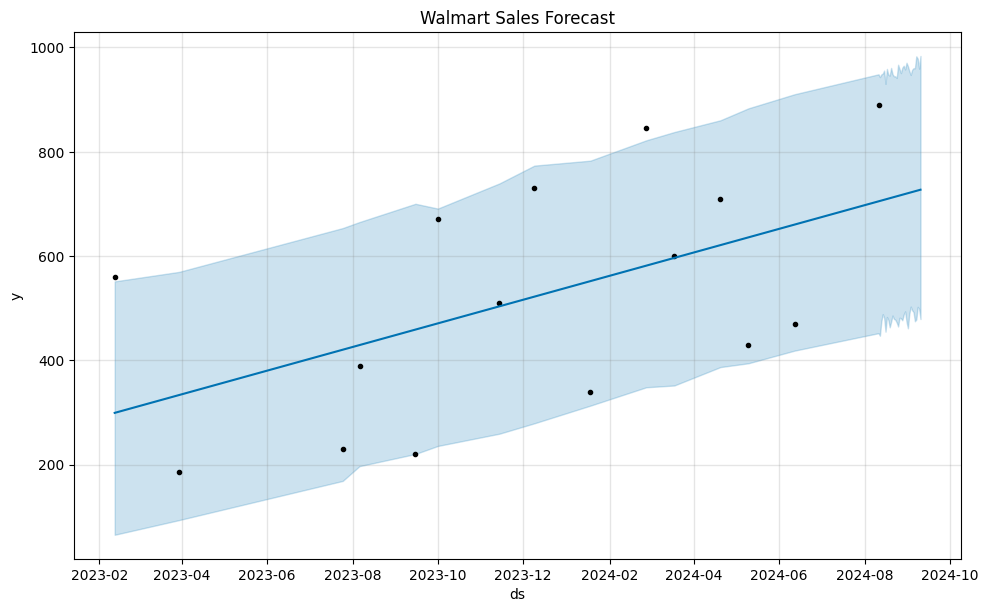

In [25]:
import matplotlib.pyplot as plt

model.plot(forecast)
plt.title("Walmart Sales Forecast")
plt.show()

In [26]:
import joblib
joblib.dump(model, "sales_forecast_model.pkl")

['sales_forecast_model.pkl']

In [27]:
from google.colab import files
files.download("sales_forecast_model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [28]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
df = pd.read_csv("daily_sales.csv")
df['ds'] = pd.to_datetime(df['ds'])  # Prophet requires datetime

In [30]:
# model_training.ipynb

# Clean column names: strip spaces and lowercase them
df.columns = df.columns.str.strip().str.lower()

# Print the columns to verify
print(df.columns)

# Rename to Prophet format
df.rename(columns={'date': 'ds', 'sales': 'y'}, inplace=True)

# Ensure 'ds' is datetime
df['ds'] = pd.to_datetime(df['ds'])

# Now fit the model
model = Prophet()
model.fit(df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 11.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2rna_qu2/awbx08wv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2rna_qu2/ixo7flwc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59274', 'data', 'file=/tmp/tmp2rna_qu2/awbx08wv.json', 'init=/tmp/tmp2rna_qu2/ixo7flwc.json', 'output', 'file=/tmp/tmp2rna_qu2/prophet_modelbgyx17uv/prophet_model-20250806172815.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
17:28:15 - cmdstanpy - INFO - Chain [1] start processing
I

Index(['ds', 'y'], dtype='object')


In [31]:
# model_training.ipynb

import pandas as pd
from prophet import Prophet
import joblib

# Load the daily_sales data explicitly
daily_sales = pd.read_csv("daily_sales.csv")

# Clean column names: strip spaces and lowercase them
daily_sales.columns = daily_sales.columns.str.strip().str.lower()

# Rename to Prophet format
daily_sales.rename(columns={'date': 'ds', 'sales': 'y'}, inplace=True)

# Ensure 'ds' is datetime
daily_sales['ds'] = pd.to_datetime(daily_sales['ds'])

# Train model using daily_sales
model = Prophet()
model.fit(daily_sales)

# Save model
joblib.dump(model, 'sales_forecast_model.pkl')

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 11.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2rna_qu2/4t__etvt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2rna_qu2/01k702zk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45488', 'data', 'file=/tmp/tmp2rna_qu2/4t__etvt.json', 'init=/tmp/tmp2rna_qu2/01k702zk.json', 'output', 'file=/tmp/tmp2rna_qu2/prophet_modelr0ur7325/prophet_model-20250806172818.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
17:28:18 - cmdstanpy - INFO - Chain [1] start processing
I

['sales_forecast_model.pkl']